# Trabalho final ML

<a href="">Dataset</a>
<br>
<hr>
</br>
Contexto e objetivo do trabalho
O trabalho prático da disciplina CMP263 - Aprendizagem de Máquina visa
permitir que os alunos desenvolvam um modelo preditivo para um problema de
interesse, praticando aspectos discutidos na disciplina relacionados ao treinamento e
avaliação de modelos de classificação ou regressão, e interpretação dos modelos
gerados.
A proposta do projeto final é que os alunos aprofundem e consolidem sua
experiência no desenvolvimento de modelos preditivos, abordando aspectos ao
longo de toda a metodologia de treinamento de modelos, conforme discutimos em
aula. 

In [36]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.preprocessing import sequence
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## i) análise exploratória dos dados
para identificar possíveis problemas nos
dados que possam impactar negativamente no treinamento de modelos;

In [21]:
df = pd.read_csv('b_depressed.csv')
df

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1424,255,22,1,25,1,1,7,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1425,547,69,1,28,1,4,10,6,15711078,24023054,...,0,1,0,0,23022095,1021536,0,1823477,47384361.0,0
1426,893,184,1,66,0,0,1,1,42440731,22861940,...,0,1,0,0,12545373,10454478,0,46444572,10454478.0,1
1427,363,75,1,51,1,1,12,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1429 entries, 0 to 1428
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survey_id              1429 non-null   int64  
 1   Ville_id               1429 non-null   int64  
 2   sex                    1429 non-null   int64  
 3   Age                    1429 non-null   int64  
 4   Married                1429 non-null   int64  
 5   Number_children        1429 non-null   int64  
 6   education_level        1429 non-null   int64  
 7   total_members          1429 non-null   int64  
 8   gained_asset           1429 non-null   int64  
 9   durable_asset          1429 non-null   int64  
 10  save_asset             1429 non-null   int64  
 11  living_expenses        1429 non-null   int64  
 12  other_expenses         1429 non-null   int64  
 13  incoming_salary        1429 non-null   int64  
 14  incoming_own_farm      1429 non-null   int64  
 15  inco

In [9]:
df.shape

(1429, 23)

In [10]:
df.head()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
0,926,91,1,28,1,4,10,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
1,747,57,1,23,1,3,8,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,1
2,1190,115,1,22,1,3,9,5,28912201,22861940,...,0,0,0,0,30028818,31363432,0,28411718,28292707.0,0
3,1065,97,1,27,1,2,10,4,52667108,19698904,...,0,1,0,1,22288055,18751329,0,7781123,69219765.0,0
4,806,42,0,59,0,4,10,6,82606287,17352654,...,1,0,0,0,53384566,20731006,1,20100562,43419447.0,0


In [11]:
df.columns

Index(['Survey_id', 'Ville_id', 'sex', 'Age', 'Married', 'Number_children',
       'education_level', 'total_members', 'gained_asset', 'durable_asset',
       'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen', 'depressed'],
      dtype='object')

In [12]:
min(df['Age'])

17

In [13]:
max(df['Age'])

91

In [14]:
df.mean()

Survey_id                7.150000e+02
Ville_id                 7.628621e+01
sex                      9.181246e-01
Age                      3.477747e+01
Married                  7.725682e-01
Number_children          2.883135e+00
education_level          8.687194e+00
total_members            4.969209e+00
gained_asset             3.363448e+07
durable_asset            2.717296e+07
save_asset               2.742471e+07
living_expenses          3.248257e+07
other_expenses           3.366632e+07
incoming_salary          1.798460e-01
incoming_own_farm        2.519244e-01
incoming_business        1.077677e-01
incoming_no_business     2.603219e-01
incoming_agricultural    3.451039e+07
farm_expenses            3.549153e+07
labor_primary            2.134360e-01
lasting_investment       3.299222e+07
no_lasting_investmen     3.360385e+07
depressed                1.665500e-01
dtype: float64

In [15]:
df.describe()

,Survey_id,Ville_id,sex,Age,Married,Number_children,education_level,total_members,gained_asset,durable_asset,...,incoming_salary,incoming_own_farm,incoming_business,incoming_no_business,incoming_agricultural,farm_expenses,labor_primary,lasting_investment,no_lasting_investmen,depressed
count,1429.00000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,...,1429.000000,1429.000000,1429.000000,1429.000000,1.429000e+03,1.429000e+03,1429.000000,1.429000e+03,1.409000e+03,1429.000000
mean,715.00000,76.286214,0.918125,34.777467,0.772568,2.883135,8.687194,4.969209,3.363448e+07,2.717296e+07,...,0.179846,0.251924,0.107768,0.260322,3.451039e+07,3.549153e+07,0.213436,3.299222e+07,3.360385e+07,0.166550
std,412.66108,66.444012,0.274271,13.986219,0.419320,1.874472,2.923532,1.786317,2.003854e+07,1.815672e+07,...,0.384194,0.434270,0.310195,0.438964,2.077846e+07,2.112372e+07,0.409876,2.121621e+07,2.160228e+07,0.372704
min,1.00000,1.000000,0.000000,17.000000,0.000000,0.000000,1.000000,1.000000,3.251120e+05,1.625560e+05,...,0.000000,0.000000,0.000000,0.000000,3.251120e+05,2.715050e+05,0.000000,7.429200e+04,1.263120e+05,0.000000
25%,358.00000,24.000000,1.000000,25.000000,1.000000,2.000000,8.000000,4.000000,2.326982e+07,1.929852e+07,...,0.000000,0.000000,0.000000,0.000000,2.322229e+07,2.279966e+07,0.000000,2.001911e+07,2.064203e+07,0.000000
50%,715.00000,57.000000,1.000000,30.000000,1.000000,3.000000,9.000000,5.000000,2.891220e+07,2.286194e+07,...,0.000000,0.000000,0.000000,0.000000,3.002882e+07,3.136343e+07,0.000000,2.841172e+07,2.829271e+07,0.000000
75%,1072.00000,105.000000,1.000000,42.000000,1.000000,4.000000,10.000000,6.000000,3.717283e+07,2.656950e+07,...,0.000000,1.000000,0.000000,1.000000,4.003842e+07,4.348584e+07,0.000000,3.982686e+07,4.151762e+07,0.000000
max,1429.00000,292.000000,1.000000,91.000000,1.000000,11.000000,19.000000,12.000000,9.912755e+07,9.961560e+07,...,1.000000,1.000000,1.000000,1.000000,9.978910e+07,9.965119e+07,1.000000,9.944667e+07,9.965119e+07,1.000000


### Count NAN in each column

In [18]:
df.isnull().sum()

Survey_id                 0
Ville_id                  0
sex                       0
Age                       0
Married                   0
Number_children           0
education_level           0
total_members             0
gained_asset              0
durable_asset             0
save_asset                0
living_expenses           0
other_expenses            0
incoming_salary           0
incoming_own_farm         0
incoming_business         0
incoming_no_business      0
incoming_agricultural     0
farm_expenses             0
labor_primary             0
lasting_investment        0
no_lasting_investmen     20
depressed                 0
dtype: int64

## Detecção de outliers

Melhorar a perfomance do R² (score)

<AxesSubplot:xlabel='no_lasting_investmen'>

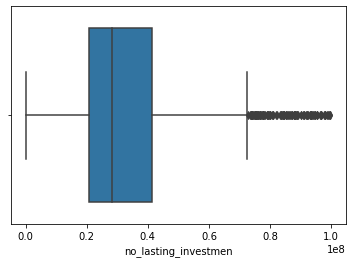

In [32]:
sns.boxplot(x=df['no_lasting_investmen'])

<AxesSubplot:xlabel='education_level'>

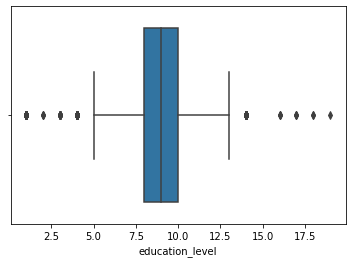

In [35]:
sns.boxplot(x=df['education_level'])

<AxesSubplot:xlabel='lasting_investment'>

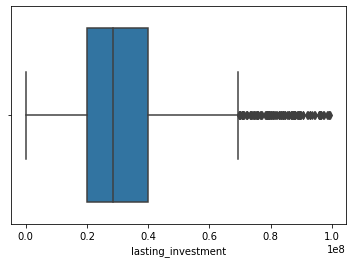

In [33]:
sns.boxplot(x=df['lasting_investment'])

<AxesSubplot:xlabel='lasting_investment', ylabel='lasting_investment'>

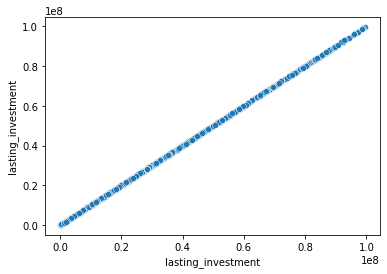

In [55]:
sns.scatterplot(data=df, x="lasting_investment", y="lasting_investment")


## ii) pré-processamento dos dados
abordando aspectos como correção de
outliers e de valores faltantes, codificação de atributos categóricos, discretização de
atributos numéricos, normalização, ajuste de desbalanceamento de classes e
redução de dimensionalidade

### Removendo NAN

In [19]:
df.drop(df[(df['no_lasting_investmen'].isnull())].index, axis = 0, inplace = True)
df.isnull().sum()

Survey_id                0
Ville_id                 0
sex                      0
Age                      0
Married                  0
Number_children          0
education_level          0
total_members            0
gained_asset             0
durable_asset            0
save_asset               0
living_expenses          0
other_expenses           0
incoming_salary          0
incoming_own_farm        0
incoming_business        0
incoming_no_business     0
incoming_agricultural    0
farm_expenses            0
labor_primary            0
lasting_investment       0
no_lasting_investmen     0
depressed                0
dtype: int64

In [20]:
df.columns

Index(['Survey_id', 'Ville_id', 'sex', 'Age', 'Married', 'Number_children',
       'education_level', 'total_members', 'gained_asset', 'durable_asset',
       'save_asset', 'living_expenses', 'other_expenses', 'incoming_salary',
       'incoming_own_farm', 'incoming_business', 'incoming_no_business',
       'incoming_agricultural', 'farm_expenses', 'labor_primary',
       'lasting_investment', 'no_lasting_investmen', 'depressed'],
      dtype='object')

## iii) treinamento e validação dos modelos,
utilizando as melhores práticas em relação a estratégias de divisão de dados para otimização de hiperparâmetros e
seleção de modelos

 - Acurácia
 - Precision
 - Recall
 - F1 Score
 - ROC AUC score

## iv) interpretação do modelo treinado, 
buscando obter insights sobre o impacto dos atributos na tomada de decisão